# Train sizing
---------------------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the Australian weather dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target RainTomorrow.

## Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the Australian weather dataset
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look at the data
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Run the pipeline

In [3]:
# Initialize ATOM and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.clean()
atom.impute(strat_num="median", strat_cat="most_frequent", min_frac_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (142193, 22)
Scaled: False
Missing values: 316559 (10.12%)
Categorical columns: 5 (22.73%)
Duplicate samples: 45 (0.03%)
-------------------------------------
Train set size: 113755
Test set size: 28438
-------------------------------------
Dataset balance: No:Yes <==> 3.5:1.0
-------------------------------------
|     |   dataset |   train |   test |
|:----|----------:|--------:|-------:|
| No  |    110316 |   88263 |  22053 |
| Yes |     31877 |   25492 |   6385 |

Applying data cleaning...
 --> Label-encoding the target column.
Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 samples for containing less than 80% non-missing values.
 --> Imputing 100 missing values with median in feature MinTemp.
 --> Imputing 57 missing values with median in feature MaxTemp.
 --> Imputing 640 missing values with median in feature Rainfall.
 --> Imput

In [4]:
# We can analyze the impact of the training set's size on a LightGBM model
atom.train_sizing("LGB", train_sizes=np.linspace(0.1, 1, 10), bagging=4, verbose=0)
atom.scoring()

LightGBM --> f1: 0.592 ± 0.0024 ~
LightGBM --> f1: 0.6111 ± 0.0036
LightGBM --> f1: 0.6205 ± 0.0026
LightGBM --> f1: 0.6248 ± 0.0042
LightGBM --> f1: 0.6246 ± 0.0063
LightGBM --> f1: 0.6315 ± 0.0036
LightGBM --> f1: 0.6363 ± 0.0029
LightGBM --> f1: 0.6342 ± 0.0027
LightGBM --> f1: 0.6382 ± 0.0039
LightGBM --> f1: 0.6378 ± 0.0021


## Analyze the results

In [5]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the fraction (without the dot)
atom.results

,,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
frac,model,,,,,,,
0.1,LGB01,0.817852,0.609160,0.667s,0.592008,0.002407,1.402s,2.070s
0.2,LGB02,0.744018,0.623409,0.835s,0.611083,0.003597,1.828s,2.663s
0.3,LGB03,0.709584,0.630853,1.033s,0.620520,0.002570,2.246s,3.280s
0.4,LGB04,0.693374,0.632718,1.216s,0.624846,0.004187,2.695s,3.913s
0.5,LGB05,0.683844,0.637217,1.474s,0.624575,0.006299,3.149s,4.624s
0.6,LGB06,0.680720,0.639012,1.678s,0.631484,0.003598,3.577s,5.255s
0.7,LGB07,0.677526,0.640312,1.977s,0.636251,0.002910,4.074s,6.052s
0.8,LGB08,0.673214,0.637478,2.078s,0.634215,0.002675,4.467s,6.546s
0.9,LGB09,0.666742,0.641630,2.289s,0.638174,0.003935,4.967s,7.257s


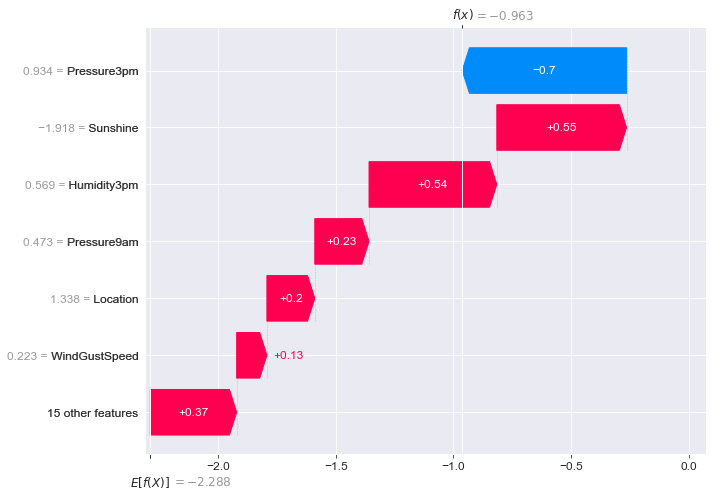

In [6]:
# Every model can be accessed through its name
atom.lgb05.waterfall_plot(show=7)

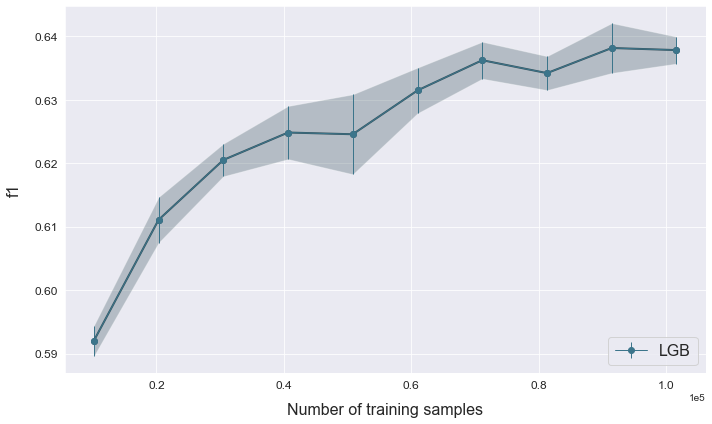

In [7]:
# Plot the train sizing's results
atom.plot_learning_curve()